<a href="https://colab.research.google.com/github/keithferns98/BankLoan/blob/main/bankLoan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
import warnings
from collections import Counter
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df=pd.read_csv('bankloan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [4]:
df=df.dropna()

In [5]:
df.shape

(480, 13)

In [6]:
df.isna().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [7]:

df['LoanAmount']=(df['LoanAmount']*1000).astype(int)
Counter(df['Loan_Status'])

Counter({'N': 148, 'Y': 332})

In [8]:
df=df.drop('Loan_ID',axis=1)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128000,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66000,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120000,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141000,360.0,1.0,Urban,Y
5,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0.0,Graduate,No,2900,0.0,71000,360.0,1.0,Rural,Y
610,Male,Yes,3.0,Graduate,No,4106,0.0,40000,180.0,1.0,Rural,Y
611,Male,Yes,1.0,Graduate,No,8072,240.0,253000,360.0,1.0,Urban,Y
612,Male,Yes,2.0,Graduate,No,7583,0.0,187000,360.0,1.0,Urban,Y


In [9]:
X=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']
dm_X=pd.get_dummies(X)
dm_y=y.map(dict(Y=1,N=0))
X.shape,y.shape

((480, 11), (480,))

In [10]:
dm_X

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1.0,4583,1508.0,128000,360.0,1.0,0,1,0,1,1,0,1,0,1,0,0
2,0.0,3000,0.0,66000,360.0,1.0,0,1,0,1,1,0,0,1,0,0,1
3,0.0,2583,2358.0,120000,360.0,1.0,0,1,0,1,0,1,1,0,0,0,1
4,0.0,6000,0.0,141000,360.0,1.0,0,1,1,0,1,0,1,0,0,0,1
5,2.0,5417,4196.0,267000,360.0,1.0,0,1,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,2900,0.0,71000,360.0,1.0,1,0,1,0,1,0,1,0,1,0,0
610,3.0,4106,0.0,40000,180.0,1.0,0,1,0,1,1,0,1,0,1,0,0
611,1.0,8072,240.0,253000,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1
612,2.0,7583,0.0,187000,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1


In [11]:
dm_y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

In [12]:
#from imblearn.combine import SMOTEENN
#smoteenn=SMOTEENN(ratio='minority')
#X1,y1=smoteenn.fit_resample(dm_X,dm_y)
#sc=MinMaxScaler()
#X1=sc.fit_transform(X1)


In [13]:
smote=SMOTE(ratio='minority')
X1,y1=smote.fit_resample(dm_X,dm_y)
sc=MinMaxScaler()
X1=sc.fit_transform(X1)

In [14]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128000,360.0,1.0,Rural
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66000,360.0,1.0,Urban
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120000,360.0,1.0,Urban
4,Male,No,0.0,Graduate,No,6000,0.0,141000,360.0,1.0,Urban
5,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267000,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0.0,Graduate,No,2900,0.0,71000,360.0,1.0,Rural
610,Male,Yes,3.0,Graduate,No,4106,0.0,40000,180.0,1.0,Rural
611,Male,Yes,1.0,Graduate,No,8072,240.0,253000,360.0,1.0,Urban
612,Male,Yes,2.0,Graduate,No,7583,0.0,187000,360.0,1.0,Urban


In [15]:
Counter(y1)

Counter({0: 332, 1: 332})

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X1,y1,test_size=0.2,random_state=42,shuffle=True)

In [17]:
X_train.shape,X_test.shape[1]

((531, 17), 17)

In [18]:
X_train

array([[0.        , 0.03030303, 0.05647664, ..., 0.        , 1.        ,
        0.        ],
       [0.53407366, 0.05346683, 0.01772766, ..., 0.39777901, 0.60222099,
        0.        ],
       [0.12524774, 0.07519892, 0.10598927, ..., 0.81212839, 0.18787161,
        0.        ],
       ...,
       [0.        , 0.11048856, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.0462214 , 0.07887815, ..., 0.        , 1.        ,
        0.        ],
       [0.66666667, 0.03915894, 0.10343707, ..., 0.        , 0.        ,
        1.        ]])

In [235]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(200,activation='relu',input_dim=X_test.shape[1]))
model.add(tf.keras.layers.Dense(400,activation='relu'))
model.add(tf.keras.layers.Dense(4,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=20,epochs=100)
eval_model=model.evaluate(X_train,y_train)
eval_model

Epoch 1/100
27/27 [==============================] - 1s 3ms/step - loss: 0.6877 - accuracy: 0.5556
Epoch 2/100
27/27 [==============================] - 0s 3ms/step - loss: 0.6532 - accuracy: 0.6704
Epoch 3/100
27/27 [==============================] - 0s 3ms/step - loss: 0.5788 - accuracy: 0.7269
Epoch 4/100
27/27 [==============================] - 0s 3ms/step - loss: 0.5181 - accuracy: 0.7439
Epoch 5/100
27/27 [==============================] - 0s 3ms/step - loss: 0.5178 - accuracy: 0.7363
Epoch 6/100
27/27 [==============================] - 0s 3ms/step - loss: 0.4928 - accuracy: 0.7721
Epoch 7/100
27/27 [==============================] - 0s 3ms/step - loss: 0.4832 - accuracy: 0.7702
Epoch 8/100
27/27 [==============================] - 0s 3ms/step - loss: 0.4840 - accuracy: 0.7495
Epoch 9/100
27/27 [==============================] - 0s 3ms/step - loss: 0.4697 - accuracy: 0.7853
Epoch 10/100
27/27 [==============================] - 0s 3ms/step - loss: 0.4601 - accuracy: 0.7928
Epoch 11/

[0.23395711183547974, 0.9077212810516357]

In [236]:
y_pred=model.predict(X_test)
y_pred

array([[8.6530125e-01],
       [5.1035285e-03],
       [5.0920665e-01],
       [8.5643405e-01],
       [9.9341536e-01],
       [9.2404950e-01],
       [2.2223592e-04],
       [6.3834953e-01],
       [5.0562334e-01],
       [9.1938776e-01],
       [9.4279093e-01],
       [8.3671129e-01],
       [1.7365035e-01],
       [9.4104999e-01],
       [9.2222202e-01],
       [2.9546231e-02],
       [9.2676723e-01],
       [3.5882327e-05],
       [8.8674116e-01],
       [9.6598130e-01],
       [8.7365556e-01],
       [9.8361611e-01],
       [9.0728307e-01],
       [8.5015184e-01],
       [1.6826421e-02],
       [9.3295121e-01],
       [1.0565221e-03],
       [3.9218664e-03],
       [9.4557339e-01],
       [9.9250746e-01],
       [1.8498123e-02],
       [5.6038360e-08],
       [1.2964606e-03],
       [8.5845685e-01],
       [8.9655483e-01],
       [5.2708238e-02],
       [5.0982332e-01],
       [1.6247270e-01],
       [8.4137774e-01],
       [2.2393316e-02],
       [8.5085797e-01],
       [7.677376

In [237]:
y_pred=(y_pred>0.52)

In [238]:
y_pred

array([[ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

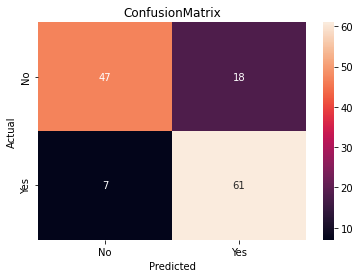

In [239]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
ax=plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('ConfusionMatrix')
ax.xaxis.set_ticklabels(['No','Yes'])
ax.yaxis.set_ticklabels(['No','Yes'])

In [234]:
accuracy_score(y_test,y_pred)

0.7969924812030075

In [240]:
from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import accuracy_score

lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

print("Accuracy_Score",accuracy_score(y_test,y_pred)*100)

Accuracy_Score 67.66917293233082
